![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [70]:
# Start your code here!
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
from scipy.stats import ttest_ind

df_men = pd.read_csv('men_results.csv')
df_women = pd.read_csv('women_results.csv')

## **Filtering The Data**

In [71]:
def df_con(df):
    con1 = df['tournament'] == 'FIFA World Cup'
    con2 = df['date'] >= '2002-01-01'
    return df[con1 & con2]

df_men_worldcup = df_con(df_men)
df_women_worldcup = df_con(df_women)

## **Checking Normality & Hypothesis To Perform**

384 200


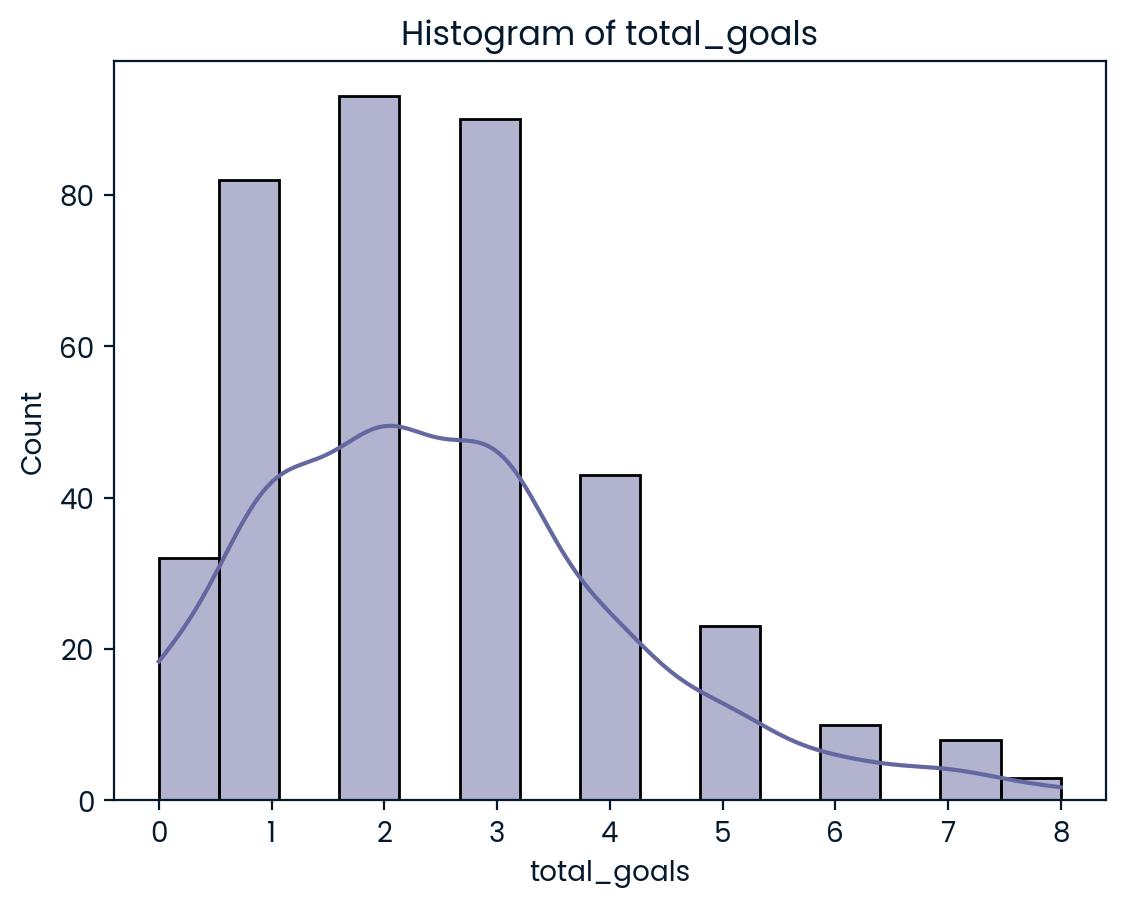

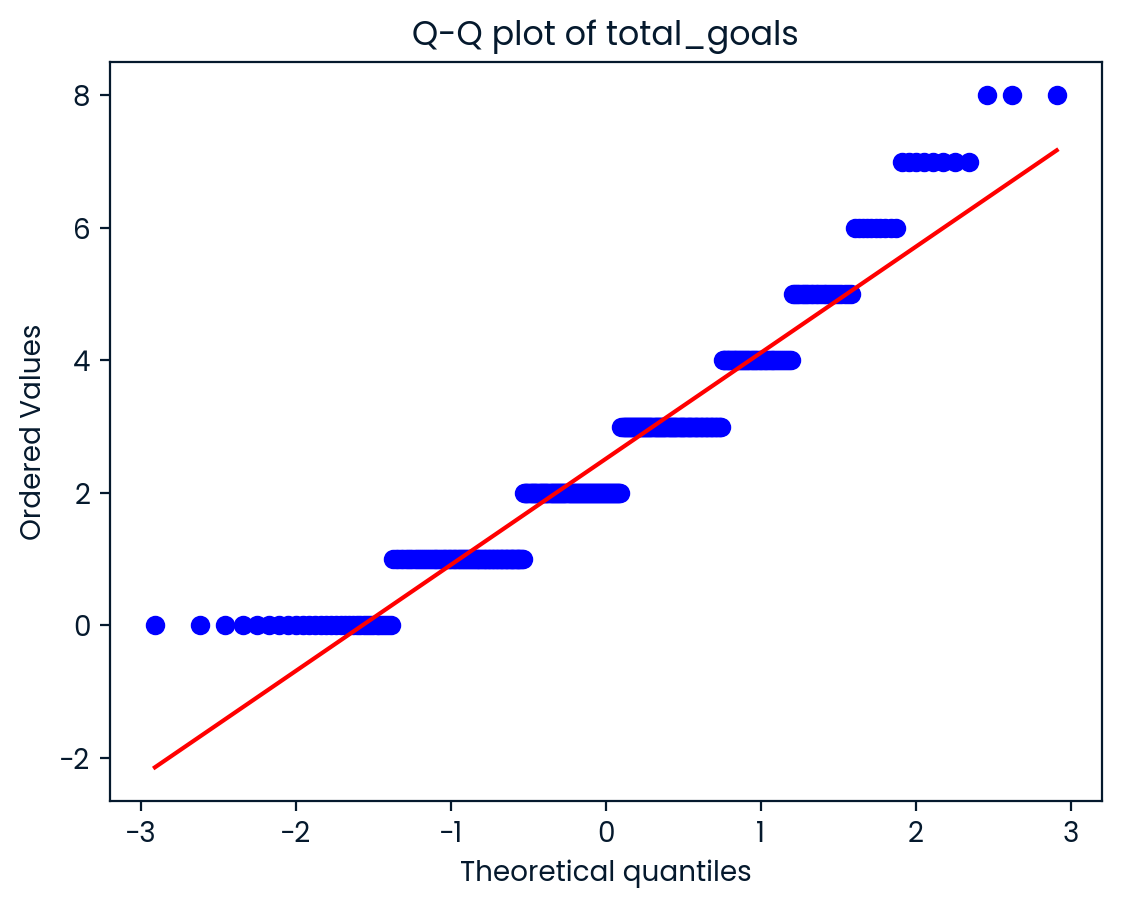

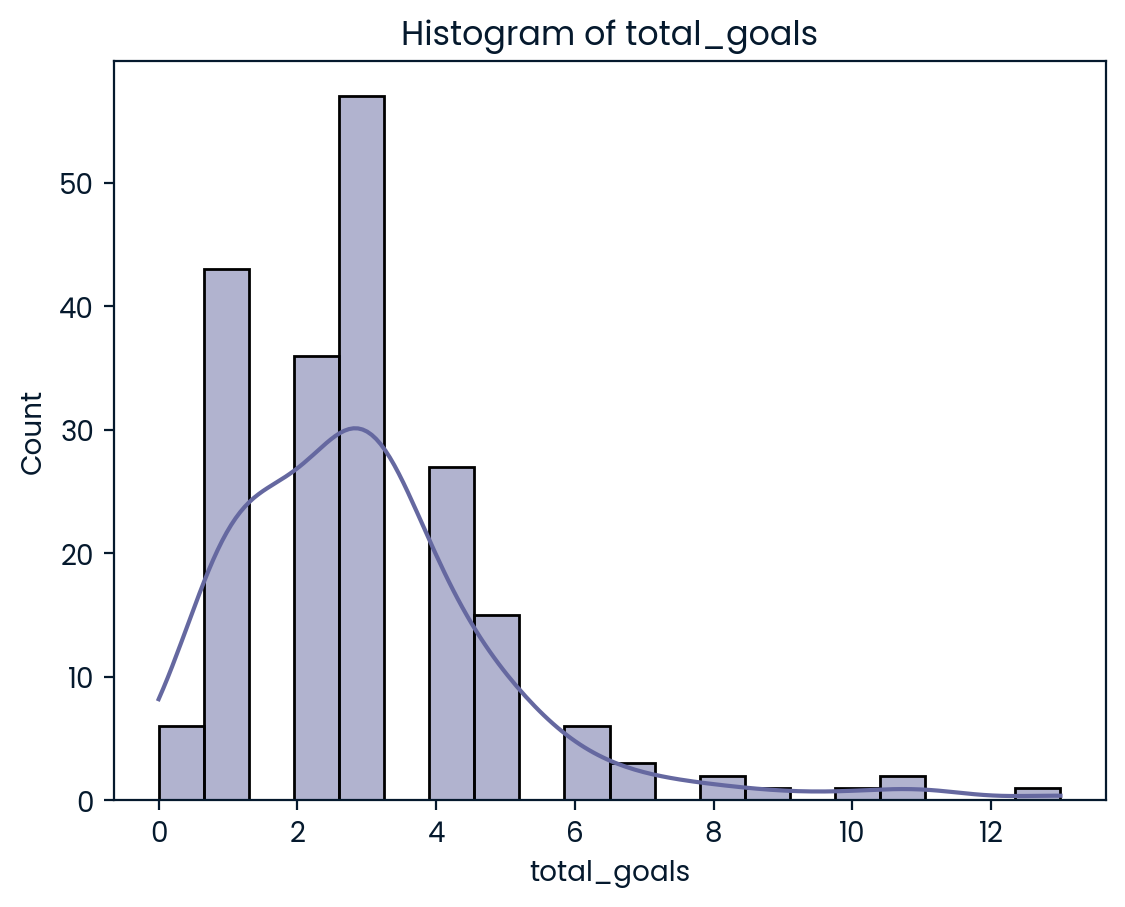

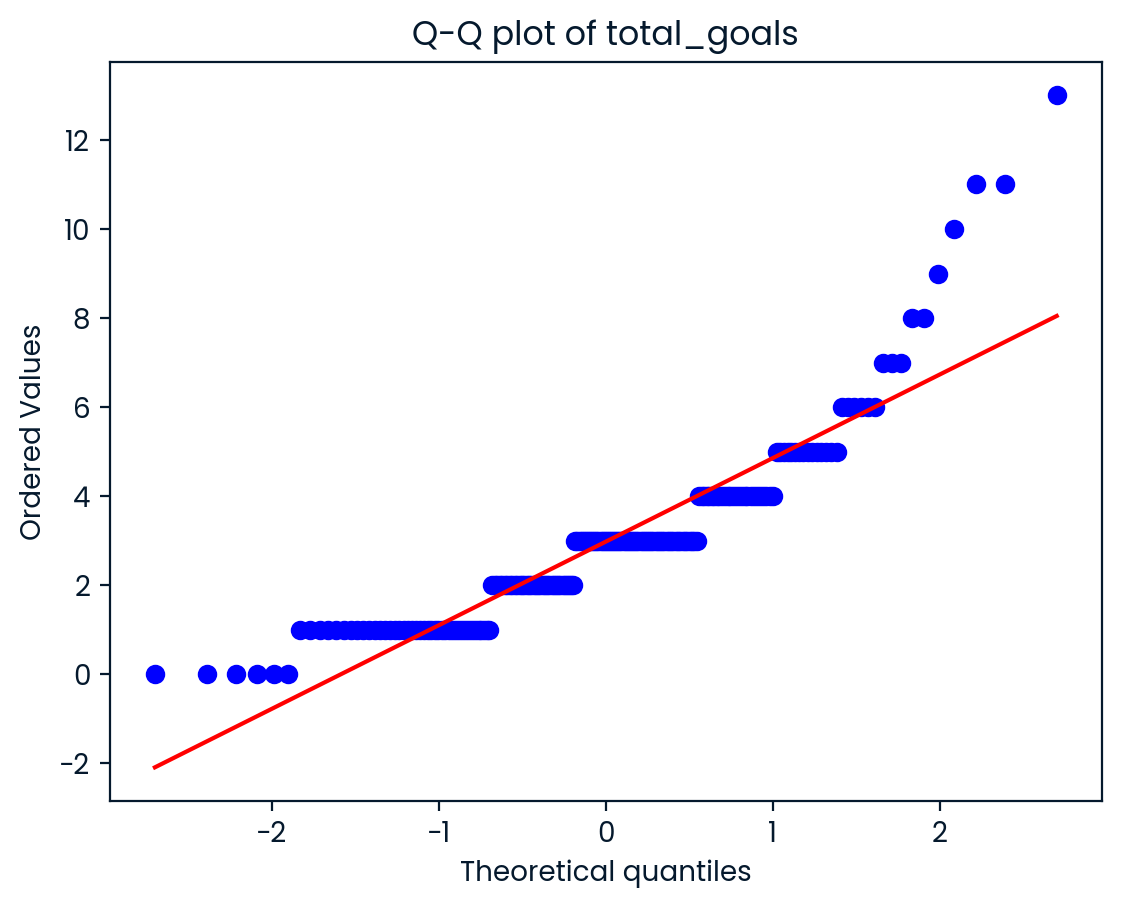

In [72]:
def check_normality(data, column_name):
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Histogram of {column_name}')
    plt.show()
    
    stats.probplot(data[column_name], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {column_name}')
    plt.show()

sample_size_men = len(df_men_worldcup)
sample_size_women = len(df_women_worldcup)
print(sample_size_men, sample_size_women)

df_men_worldcup['total_goals'] = df_men_worldcup['home_score'] + df_men_worldcup['away_score']
df_women_worldcup['total_goals'] = df_women_worldcup['home_score'] + df_women_worldcup['away_score']

check_normality(df_men_worldcup, 'total_goals')
check_normality(df_women_worldcup, 'total_goals')

## **Pivoting Table, Performing Hypothesis, & Extracting P-Value** 

In [73]:
df_men_pivot = df_men_worldcup.pivot(index='date', columns='home_team', values='total_goals')
df_women_pivot = df_women_worldcup.pivot(index='date', columns='home_team', values='total_goals')

alpha = 0.1

x = df_men_pivot.values.flatten()
y = df_women_pivot.values.flatten()

x = x[~pd.isna(x)]
y = y[~pd.isna(y)]


t_stat, p_val = ttest_ind(x, y, equal_var=False)

result = ''
if p_val <= alpha:
    result = 'reject'
else:
    result = 'fail to reject'

result_dict = {
    'p_val': p_val,
    'result': result
}
result_dict

{'p_val': 0.005196144800974298, 'result': 'reject'}